In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel('data.xls', index_col=None,na_values=['NA'])
data.head()
data['Unnamed: 5'] = data['Unnamed: 5'].convert_objects(convert_numeric=True)
data['Unnamed: 6'] = data['Unnamed: 6'].convert_objects(convert_numeric=True)

In [4]:
# data.apply(lambda x:sum(x.isnull()),axis=0)

In [5]:
# data.fillna(0)
data=data.drop(data.index[0])
data=data.drop(data.index[-1])
data.head(1)


PROGRAM  \
PRG_0001  Centers for Ocean Sciences Education Excellence ~   

                           Unnamed: 1                         Unnamed: 2  \
PRG_0001  National Science Foundation  Directorate for Geosciences (GEO)   

                                                 Unnamed: 3 FUNDING  \
PRG_0001  The Division of Ocean Sciences seeks to establ...    2002   

          Unnamed: 5  Unnamed: 6 Unnamed: 7    Unnamed: 8 Unnamed: 9  \
PRG_0001        5.24        7.19        5.7  General STEM        NaN   

             ...      Unnamed: 245 Unnamed: 246 Unnamed: 247 Unnamed: 248  \
PRG_0001     ...               NaN          NaN          NaN          NaN   

         Unnamed: 249 Unnamed: 250 Unnamed: 251 Unnamed: 252 Unnamed: 253  \
PRG_0001           NO  INDEPENDENT          NaN          NaN  INDEPENDENT   

         Unnamed: 254  
PRG_0001          NaN  

[1 rows x 255 columns]

In [6]:
#removing columns where NaN values are more than 40%
pct_null = data.isnull().sum() / len(data)       #calculating % of NaN values
missing_features = pct_null[pct_null > 0.40].index    #columns with missing values more than 40%
# print(missing_features)                                 
data.drop(missing_features, axis=1, inplace=True)       #droping columns with mising values more than 40%
data.head()


PROGRAM  \
PRG_0001  Centers for Ocean Sciences Education Excellence ~   
PRG_0002        Broadening Participation in Computing (BPC)   
PRG_0003  CISE Pathways to Revitalized Undergraduate Com...   
PRG_0004  Opportunities for Enhancing Diversity in the G...   
PRG_0005                               Geoscience Education   

                           Unnamed: 1  \
PRG_0001  National Science Foundation   
PRG_0002  National Science Foundation   
PRG_0003  National Science Foundation   
PRG_0004  National Science Foundation   
PRG_0005  National Science Foundation   

                                                 Unnamed: 2  \
PRG_0001                  Directorate for Geosciences (GEO)   
PRG_0002  Directorate for Computer & Information Science...   
PRG_0003  Directorate for Computer & Information Science...   
PRG_0004                  Directorate for Geosciences (GEO)   
PRG_0005                  Directorate for Geosciences (GEO)   

                                                 Unnamed: 3 FUNDING  \
PRG_0001  The Division of Ocean Sciences seeks to establ...    2002   
PRG_0002  The BPC Program was not primarily aimed at edu...    2006   
PRG_0003  Through the CISE Pathways to Revitalized Under...    2007   
PRG_0004  The Opportunities for Enhancing Diversity in t...    2002   
PRG_0005  The Geoscience Education (GeoEd) program is fo...    1999   

          Unnamed: 5  Unnamed: 6 Unnamed: 7    Unnamed: 8  \
PRG_0001        5.24        7.19        5.7  General STEM   
PRG_0002       14.00       14.00         14  General STEM   
PRG_0003        5.00        5.00       4.37  General STEM   
PRG_0004        4.57       11.79       4.18  General STEM   
PRG_0005        1.63        2.74       2.02  General STEM   

                                          Primary Objective  \
PRG_0001  Institutional Capacity: Support advancement an...   
PRG_0002  Engagement: Increase learners’ engagement, int...   
PRG_0003  Institutional Capacity: Support advancement an...   
PRG_0004  Engagement: Increase learners’ engagement, int...   
PRG_0005  Learning: Develop STEM skills, practices, or k...   

                                                Unnamed: 43  \
PRG_0001  Engagement in authentic STEM experience (inclu...   
PRG_0002  Engagement in authentic STEM experience (inclu...   
PRG_0003  Engagement in authentic STEM experience (inclu...   
PRG_0004  Engagement in authentic STEM experience (inclu...   
PRG_0005  Engagement in authentic STEM experience (inclu...   

                                   Unnamed: 46 Audience or Beneficiary  \
PRG_0001  Training or professional development                     NaN   
PRG_0002  Training or professional development       Pre-K-20 learners   
PRG_0003                                   NaN                     NaN   
PRG_0004  Training or professional development       Pre-K-20 learners   
PRG_0005  Training or professional development       Pre-K-20 learners   

         Underrepresented or Underserved Citizens  \
PRG_0001                              No       No   
PRG_0002                             Yes       No   
PRG_0003                              No       No   
PRG_0004                             Yes       No   
PRG_0005                              No       No   

         Minority Serving Institutions Legistative Action to Change Program?  \
PRG_0001                            No                            Don't know   
PRG_0002                            No                            Don't know   
PRG_0003                            No                            Don't know   
PRG_0004                            No                            Don't know   
PRG_0005                            No                            Don't know   

                                      Outputs  \
PRG_0001                                  NaN   
PRG_0002                                  NaN   
PRG_0003                                  NaN   
PRG_0004  Number of learners (any age) served   
PRG_0

In [7]:
data["difference_of_2009_and_2008"]=data['Unnamed: 6']-data['Unnamed: 5']
# data.head(3)

In [8]:
data["growth"]=(data['difference_of_2009_and_2008']/data['Unnamed: 6'])*100.00
# data.head()

In [9]:
data['Target'] = data.apply(lambda _: '', axis=1)

In [10]:
data['Target'] = np.where(data['growth'].isnull(), np.nan, np.where(data['growth'] > 0,   1, 0))
# data

In [11]:
# STAGE 2

#univariate distribution

data['Unnamed: 2']=data['Unnamed: 2'].fillna(data['Unnamed: 2'].mode()[0])
data['FUNDING']=data['FUNDING'].fillna(data['FUNDING'].mode()[0])
data['Unnamed: 5']=data['Unnamed: 5'].fillna(data['Unnamed: 5'].mode()[0])
data['Unnamed: 6']=data['Unnamed: 6'].fillna(data['Unnamed: 6'].mode()[0])
data['Unnamed: 43']=data['Unnamed: 43'].fillna(data['Unnamed: 43'].mode()[0])
data['Unnamed: 46']=data['Unnamed: 46'].fillna(data['Unnamed: 46'].mode()[0])
data['Audience or Beneficiary']=data['Audience or Beneficiary'].fillna(data['Audience or Beneficiary'].mode()[0])
data['Minority Serving Institutions']=data['Minority Serving Institutions'].fillna(data['Minority Serving Institutions'].mode()[0])
data['Outputs']=data['Outputs'].fillna(data['Outputs'].mode()[0])
data['Outputs.1']=data['Outputs.1'].fillna(data['Outputs.1'].mode()[0])
data['difference_of_2009_and_2008']=data['difference_of_2009_and_2008'].fillna(data['difference_of_2009_and_2008'].mode()[0])
data['growth']=data['growth'].fillna(data['growth'].mode()[0])
data['Target']=data['Target'].fillna(data['Target'].mode()[0])
data['Legistative Action to Change Program?']=data['Legistative Action to Change Program?'].fillna(data['Legistative Action to Change Program?'].mode()[0])
# a=data['Unnamed: 2'].value_counts().sort_index().plot.bar()
# data.apply(lambda x:sum(x.isnull()),axis=0)
# data

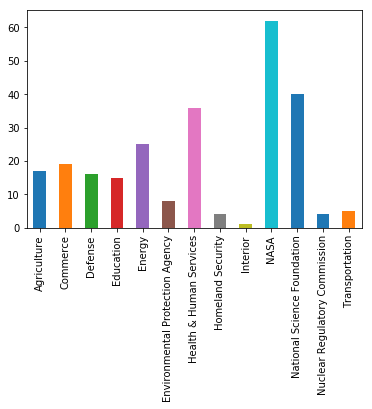

In [12]:
a=data['Unnamed: 1'].value_counts().sort_index().plot.bar()

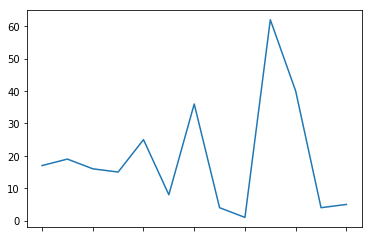

In [13]:
a=data['Unnamed: 1'].value_counts().sort_index().plot.line()

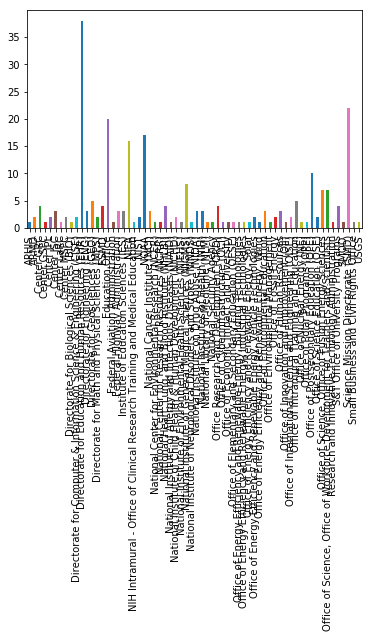

In [14]:
a=data['Unnamed: 2'].value_counts().sort_index().plot.bar()

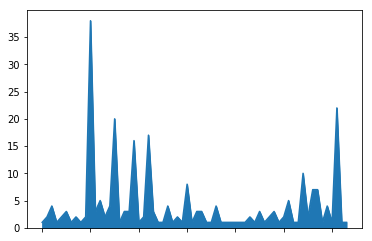

In [15]:
a=data['Unnamed: 2'].value_counts().sort_index().plot.area()

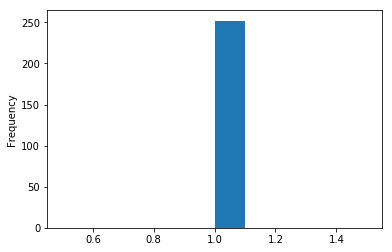

In [16]:
a=data['Unnamed: 3'].value_counts().sort_index().plot.hist()

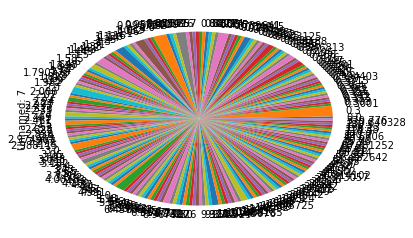

In [17]:
a=data['Unnamed: 7'].value_counts().sort_index().plot.pie()

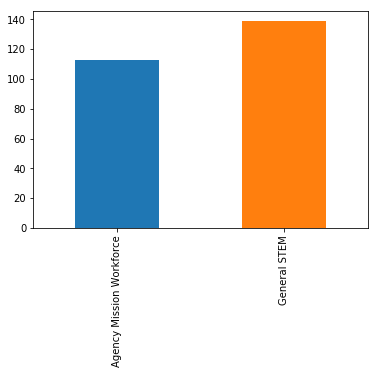

In [18]:
a=data['Unnamed: 8'].value_counts().sort_index().plot.bar()

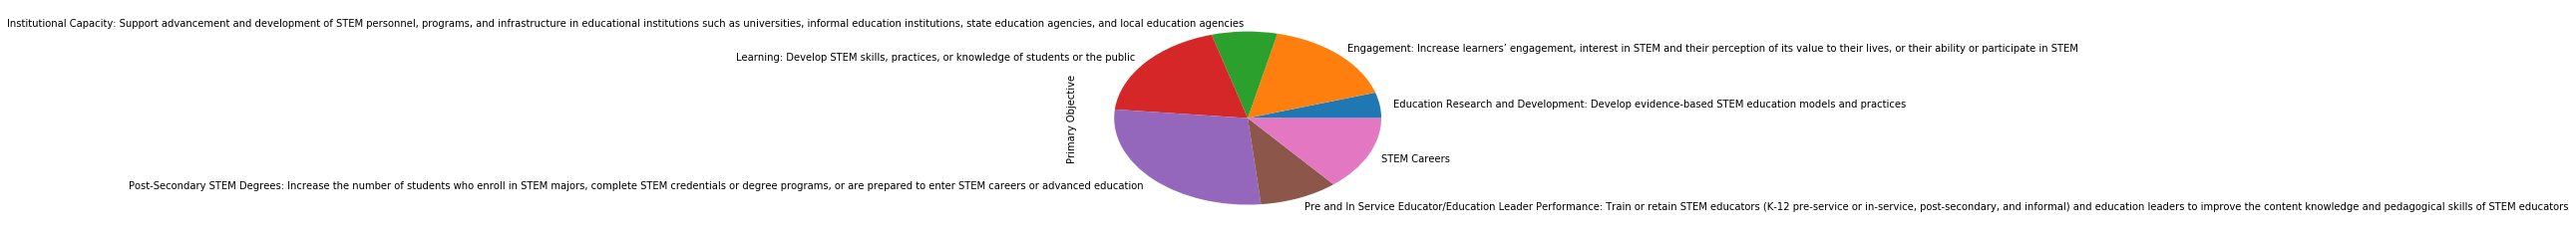

In [19]:
a=data['Primary Objective'].value_counts().sort_index().plot.pie()

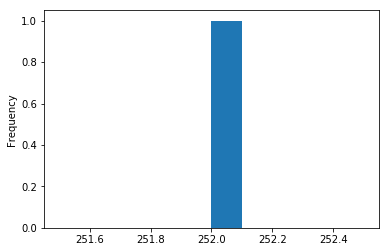

In [20]:
a=data['Unnamed: 43'].value_counts().sort_index().plot.hist()


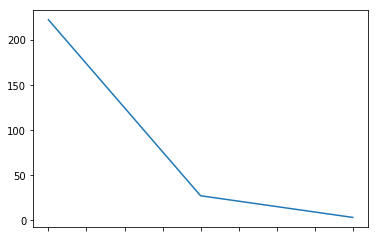

In [21]:
a=data['Minority Serving Institutions'].value_counts().sort_index().plot.line()

In [22]:
# Calculate mutual_info_score of target variable created in stage 1 & ALL non funding variables
data.apply(lambda x:sum(x.isnull()),axis=0)

PROGRAM                                  0
Unnamed: 1                               0
Unnamed: 2                               0
Unnamed: 3                               0
FUNDING                                  0
Unnamed: 5                               0
Unnamed: 6                               0
Unnamed: 7                               0
Unnamed: 8                               0
Primary Objective                        0
Unnamed: 43                              0
Unnamed: 46                              0
Audience or Beneficiary                  0
Underrepresented or Underserved          0
Citizens                                 0
Minority Serving Institutions            0
Legistative Action to Change Program?    0
Outputs                                  0
Outputs.1                                0
difference_of_2009_and_2008              0
growth                                   0
Target                                   0
dtype: int64

In [23]:
# Mutual_Info_Score


lst=['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 7','Unnamed: 8','Primary Objective','Unnamed: 43','Unnamed: 46','Audience or Beneficiary','Underrepresented or Underserved','Legistative Action to Change Program?','Outputs','Outputs.1']
from sklearn.metrics import mutual_info_score
for i in lst:
    mi=mutual_info_score(data[i], data['Target'])
    print(mi)

0.04235695929023835
0.18739185614931747
0.6337280824752447
0.5405539649964229
0.0007107572009155128
0.0042706616901877215
2.7755575615628914e-16
2.7755575615628914e-16
0.00023170926754118026
0.0015286090718672762
0.017940501027007352
3.4244344526937476e-05
2.7755575615628914e-16


In [24]:
print(data.dtypes)

PROGRAM                                   object
Unnamed: 1                                object
Unnamed: 2                                object
Unnamed: 3                                object
FUNDING                                   object
Unnamed: 5                               float64
Unnamed: 6                               float64
Unnamed: 7                                object
Unnamed: 8                                object
Primary Objective                         object
Unnamed: 43                               object
Unnamed: 46                               object
Audience or Beneficiary                   object
Underrepresented or Underserved           object
Citizens                                  object
Minority Serving Institutions             object
Legistative Action to Change Program?     object
Outputs                                   object
Outputs.1                                 object
difference_of_2009_and_2008              float64
growth              

In [25]:
data['FUNDING'] = data['FUNDING'].astype(int)
cols=['PROGRAM','Unnamed: 1','Unnamed: 2','Unnamed: 3','FUNDING','Unnamed: 7','Unnamed: 8','Primary Objective','Unnamed: 43','Unnamed: 46','Audience or Beneficiary','Underrepresented or Underserved','Citizens','Minority Serving Institutions','Legistative Action to Change Program?','Outputs','Outputs.1']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
def encoder(cols=''):
    assert type(cols) == str               #testing parameter
    return le.fit_transform(data[cols])

data_1 = data.copy()
for i in cols:
    data[i] = encoder(i)
# print(data)
# data_1


In [26]:
#  Divide data into train & test samples. (70-30 split)
from sklearn.model_selection import train_test_split
y=data['Target']   #defining the target variable
data=data.drop(['Target'],1)
data=data.drop(['difference_of_2009_and_2008'],1)
# data=data.drop(['growth'],1)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print(X_test)

(176, 20) (176,)
(76, 20) (76,)
          PROGRAM  Unnamed: 1  Unnamed: 2  Unnamed: 3  FUNDING  Unnamed: 5  \
PRG_0267      215           6          32         173       36    0.263000   
PRG_0327      199           3          54         156       34  194.000000   
PRG_0164       66           4          56          68       14    0.750000   
PRG_0068      250           9           7         251       29    0.600000   
PRG_0076       69           9          61           8       36    0.196000   
PRG_0230      180           6          30         164       29    3.029000   
PRG_0218       34           1          22          84       36    1.259000   
PRG_0223      119           6          30         209        8   16.764000   
PRG_0156       77           4          43          29       26    0.496000   
PRG_0293       39           1          22          80       28    0.826000   
PRG_0165       74           4          56         109       27    1.472000   
PRG_0303       71          12   

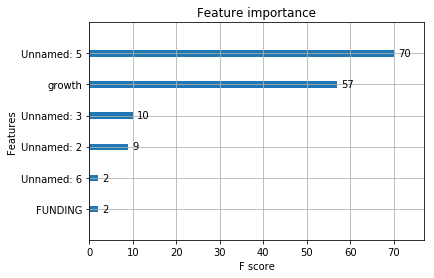

roc_auc_score  *****************************


/home/ankit/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.99

In [27]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
model=XGBClassifier()
model.fit(X_train,y_train)
plot_importance(model)
pyplot.show()
print("roc_auc_score  *****************************")
roc_auc_score(y_test, model.predict(X_test))

